3.10
<Signal Float64_Signal:
	samples=[-20. -10.   0.  10.  20.]
	timestamps=[ 0.1         0.2         0.30000001  0.40000001  0.5       ]
	unit="f8"
	info=None
	comment="">



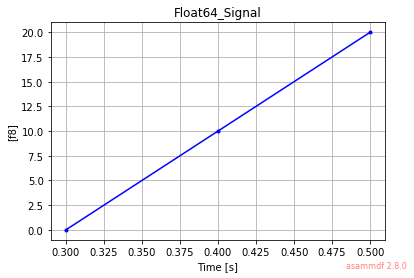

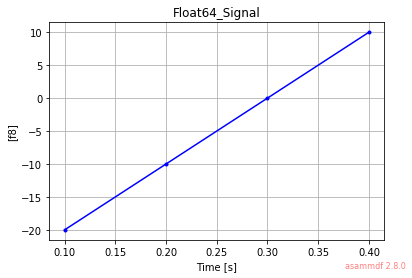

In [1]:
# -*- coding: utf-8 -*-
"""
*asammdf* MDF usage example
"""
from __future__ import print_function, division
from asammdf import MDF, Signal, configure
import numpy as np

# configure asammdf to optimize disk space usage
configure(integer_compacting=True)
# configure asammdf to split data blocks on 10KB blocks
configure(split_data_blocks=True, split_threshold=10*1024)


# create 3 Signal objects

timestamps = np.array([0.1, 0.2, 0.3, 0.4, 0.5], dtype=np.float32)

# unit8
s_uint8 = Signal(samples=np.array([0, 1, 2, 3, 4], dtype=np.uint8),
                 timestamps=timestamps,
                 name='Uint8_Signal',
                 unit='u1')
# int32
s_int32 = Signal(samples=np.array([-20, -10, 0, 10, 20], dtype=np.int32),
                 timestamps=timestamps,
                 name='Int32_Signal',
                 unit='i4')

# float64
s_float64 = Signal(samples=np.array([-20, -10, 0, 10, 20], dtype=np.float64),
                   timestamps=timestamps,
                   name='Float64_Signal',
                   unit='f8')

# create empty MDf version 4.00 file
mdf4 = MDF(version='4.10')

# append the 3 signals to the new file
signals = [s_uint8, s_int32, s_float64]
mdf4.append(signals, 'Created by Python')

# save new file
mdf4.save('my_new_file.mf4', overwrite=True)

# convert new file to mdf version 3.10 with lower possible RAM usage
mdf3 = mdf4.convert(to='3.10', memory='minimum')
print(mdf3.version)

# get the float signal
sig = mdf3.get('Float64_Signal')
print(sig)

# cut measurement from 0.3s to end of measurement
mdf4_cut = mdf4.cut(start=0.3)
mdf4_cut.get('Float64_Signal').plot()

# cut measurement from start of measurement to 0.4s
mdf4_cut = mdf4.cut(stop=0.45)
mdf4_cut.get('Float64_Signal').plot()

# filter some signals from the file
mdf4 = mdf4.filter(['Int32_Signal', 'Uint8_Signal'])

# save using zipped transpose deflate blocks
mdf4.save('out.mf4', compression=2, overwrite=True)